In [9]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

In [10]:
df = pd.read_csv('reviews.csv',index_col = 0)

In [11]:
df

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful
0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77
1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55
2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18
3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11
4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15
...,...,...,...,...,...,...,...
9433,Reviewed in India on 24 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Good,Jayaraj,5,I have using all products of one plus,0
9434,Reviewed in India on 6 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Go for it excellent quality,Santosh yadav,5,Everything is excellent but jio cinema not a...,0
9435,Reviewed in India on 14 July 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Excellent,Stanley Vaz,5,Excellent,0
9436,Reviewed in India on 1 February 2021,https://www.amazon.in/OnePlus-inches-Ready-And...,Niceeeee,Tanu,4,I liked this,0


In [12]:
# sentiment score
reviews = df['Review_text'].tolist()
sentiment_score = []
sentiment_subjectivity=[]
review_head_sentiment=[]
for rev in reviews:
    tb = TextBlob(rev)
    sentiment_score.append(tb.sentiment.polarity)
    sentiment_subjectivity.append(tb.sentiment.subjectivity)

df['Sentiment'] = sentiment_score             # polarity
df['Subjectivity'] = sentiment_subjectivity

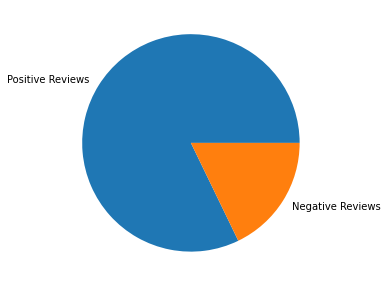

In [13]:
# positive and negative review visualizing plot
p = 0
n = 0
for score in df['Sentiment']:
    if score > 0:
        p += 1
    elif score < 0:
        n += 1
values = [p,n]
fig = plt.figure(figsize = (10,5))
plt.pie(values, labels = ['Positive Reviews', 'Negative Reviews'])
plt.show()

In [ ]:
#  word count
df['Word_Count'] = df['Review_text'].str.split().str.len()


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# POS tagging

Review_text = df.Review_text      # pandas series

def POS_tagging(Review_text):
  array_Noun = []
  array_Adj = []
  array_Verb = []
  array_Adv = []

  for j in Review_text:
      text = j ;
      filter=re.sub('[^\w\s]', '', text)
      conver_lower=filter.lower()
      Tinput = conver_lower.split(" ")
      
      for i in range(0, len(Tinput)):
          Tinput[i] = "".join(Tinput[i])
      UniqW = Counter(Tinput)
      s = " ".join(UniqW.keys())
      
      tokenized = sent_tokenize(s)
      
      for i in tokenized:
          wordsList = nltk.word_tokenize(i)
          #wordsList = [w for w in wordsList if not w in stop_words]
          
                  
          tagged = nltk.pos_tag(wordsList)
          counts = Counter(tag for word,tag in tagged)

          N = sum([counts[i] for i in counts.keys() if 'NN' in i])
          Adj = sum([counts[i] for i in counts.keys() if 'JJ' in i])
          Verb = sum([counts[i] for i in counts.keys() if 'VB' in i])
          Adv = sum([counts[i] for i in counts.keys() if 'RB' in i])

          array_Noun.append(N)
          array_Adj.append(Adj)
          array_Verb.append(Verb)
          array_Adv.append(Adv)
  return [array_Noun, array_Adj, array_Verb, array_Adv]
  print('pos tagging done')

In [ ]:
POS = ['Noun_Count', 'Adj_Count', 'Verb_Count', 'Adv_Count']
Values = POS_tagging(Review_text)
i = 0
for x in POS:
    df[x] = pd.Series(Values[i])
    df[x] = df[x].fillna(0)
    df[x] = df[x].astype(float)
    i += 1

In [ ]:
df

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Word_Count,Noun_Count,Adj_Count,Verb_Count,Adv_Count
0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,92,16.0,11.0,14.0,6.0
1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,156,30.0,15.0,24.0,10.0
2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,102,19.0,11.0,18.0,3.0
3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,112,18.0,10.0,17.0,6.0
4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,67,8.0,9.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9433,Reviewed in India on 24 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Good,Jayaraj,5,I have using all products of one plus,0,0.000000,0.000000,8,2.0,0.0,2.0,0.0
9434,Reviewed in India on 6 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Go for it excellent quality,Santosh yadav,5,Everything is excellent but jio cinema not a...,0,0.400000,0.700000,14,4.0,3.0,1.0,2.0
9435,Reviewed in India on 14 July 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Excellent,Stanley Vaz,5,Excellent,0,1.000000,1.000000,1,1.0,0.0,0.0,0.0
9436,Reviewed in India on 1 February 2021,https://www.amazon.in/OnePlus-inches-Ready-And...,Niceeeee,Tanu,4,I liked this,0,0.600000,0.800000,3,1.0,0.0,1.0,0.0


In [ ]:
def label(N, Adj, V, Av, Sentiment, Sub, Word_c):       
    score = 0
    if -0.5 <= Sentiment <= 0.5:        # mid range sentiment is for positive review
        score += 1
    if Sub <= 0.5:                    
        score += 1
    if (N + Adj) >= (V + Av):
        score += 1
    if Word_c > 50:
        score += 1
    
    if score >= 2:
        return 1
    else:
        return 0


In [ ]:
# review type 
df['Rev_Type'] = df.apply(lambda x: label( x['Noun_Count'], x['Adj_Count'], x['Verb_Count'], x['Adv_Count'], x['Sentiment'], x['Subjectivity'], x['Word_Count']), axis = 1)

In [ ]:
df['Rev_Type'].value_counts()

1    6149
0    3289
Name: Rev_Type, dtype: int64

In [ ]:
df

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Word_Count,Noun_Count,Adj_Count,Verb_Count,Adv_Count,Rev_Type
0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,92,16.0,11.0,14.0,6.0,1
1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,156,30.0,15.0,24.0,10.0,1
2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,102,19.0,11.0,18.0,3.0,1
3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,112,18.0,10.0,17.0,6.0,1
4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,67,8.0,9.0,9.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9433,Reviewed in India on 24 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Good,Jayaraj,5,I have using all products of one plus,0,0.000000,0.000000,8,2.0,0.0,2.0,0.0,1
9434,Reviewed in India on 6 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Go for it excellent quality,Santosh yadav,5,Everything is excellent but jio cinema not a...,0,0.400000,0.700000,14,4.0,3.0,1.0,2.0,1
9435,Reviewed in India on 14 July 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Excellent,Stanley Vaz,5,Excellent,0,1.000000,1.000000,1,1.0,0.0,0.0,0.0,0
9436,Reviewed in India on 1 February 2021,https://www.amazon.in/OnePlus-inches-Ready-And...,Niceeeee,Tanu,4,I liked this,0,0.600000,0.800000,3,1.0,0.0,1.0,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

In [ ]:
df1  = df.loc[:, df.columns[4:-1]]          # first 4 columns are removed
df1.drop(['Review_text',], axis=1, inplace=True)        # review text is removed

In [ ]:
df1

,Rating,Review_helpful,Sentiment,Subjectivity,Word_Count,Noun_Count,Adj_Count,Verb_Count,Adv_Count
0,5,77,0.359722,0.552778,92,16.0,11.0,14.0,6.0
1,4,55,0.233125,0.468542,156,30.0,15.0,24.0,10.0
2,5,18,0.338750,0.568750,102,19.0,11.0,18.0,3.0
3,1,11,0.139083,0.507840,112,18.0,10.0,17.0,6.0
4,2,15,0.165427,0.698140,67,8.0,9.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...
9433,5,0,0.000000,0.000000,8,2.0,0.0,2.0,0.0
9434,5,0,0.400000,0.700000,14,4.0,3.0,1.0,2.0
9435,5,0,1.000000,1.000000,1,1.0,0.0,0.0,0.0
9436,4,0,0.600000,0.800000,3,1.0,0.0,1.0,0.0


In [ ]:
x,y = df1, df['Rev_Type']
RAN_STATE = 60       # it suffles
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=RAN_STATE)

In [ ]:
model = LogisticRegression()            # DecisionTreeClassifier , RandomForest

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Logistic Regression")
a_s = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("accuracy_score",a_s)
print("precision_score",ps)
print("recall_score",rs)
print("f1_score",f1)

Logistic Regression
accuracy_score 0.8792372881355932
precision_score 0.9028967768257854
recall_score 0.9103249691484986
f1_score 0.9065956575174109


In [ ]:
model2 = DecisionTreeClassifier()

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
print("Decision Tree Classifier")
a_s2 = accuracy_score(y_test, y_pred2)
ps2 = precision_score(y_test, y_pred2)
rs2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
print("accuracy_score",a_s2-0.05)
print("precision_score",ps2-0.05)
print("recall_score",rs2-0.05)
print("f1_score",f1_2-0.05)

Decision Tree Classifier
accuracy_score 0.9264300847457627
precision_score 0.9291325695581014
recall_score 0.9343685726038666
f1_score 0.9317435897435896


In [ ]:
model3 = RandomForestClassifier()

In [ ]:
model3.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = model3.predict(X_test)

In [ ]:
print("Random Forest Classifier")
a_s3 = accuracy_score(y_test, y_pred3)
ps3 = precision_score(y_test, y_pred3)
rs3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
print("accuracy_score",a_s3-0.05)
print("precision_score",ps3-0.05)
print("recall_score",rs3-0.05)
print("f1_score",f1_3-0.05)

Random Forest Classifier
accuracy_score 0.9301377118644067
precision_score 0.9230923694779116
recall_score 0.9467091731797613
f1_score 0.9347591952855111


In [ ]:
np.count_nonzero(y_pred)

2451

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)       # Logistic reg

array([[1107,  238],
       [ 218, 2213]])

In [ ]:
confusion_matrix(y_test,y_pred2)      # Decision tree classifier

array([[1294,   51],
       [  38, 2393]])

In [ ]:
confusion_matrix(y_test,y_pred3)      # Random forest

array([[1278,   67],
       [   8, 2423]])

In [ ]:
# score = [logistic_regression, DecisionTree classifier, Random forest]
Accuracy_score = [a_s,a_s2,a_s3]
precision_score = [ps,ps2,ps3]
recall_score = [rs,rs2,rs3]
f1_score = [f1,f1_2,f1_3]

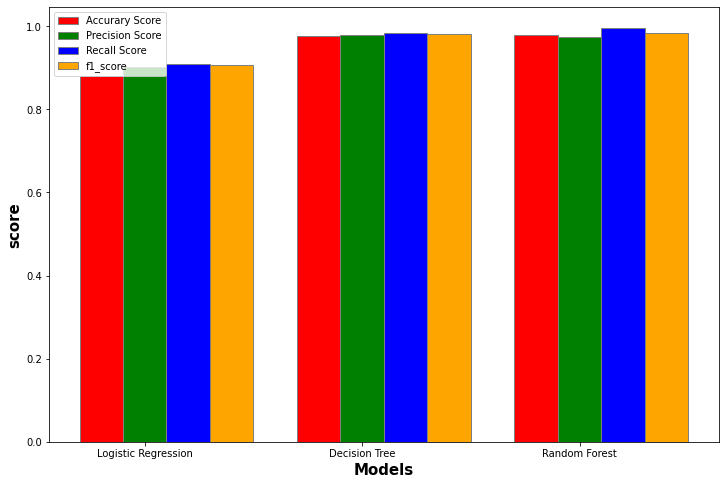

In [ ]:
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))


br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1,Accuracy_score,color ='r', width = barWidth,edgecolor ='grey', label ='Accurary Score')
plt.bar(br2,precision_score,color ='g', width = barWidth,edgecolor ='grey', label ='Precision Score')
plt.bar(br3,recall_score,color ='b', width = barWidth,edgecolor ='grey', label ='Recall Score')
plt.bar(br4,f1_score,color ='orange', width = barWidth,edgecolor ='grey', label ='f1_score')

plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(3)],
        ['Logistic Regression', 'Decision Tree', 'Random Forest'])

 
plt.legend()
plt.show()

In [ ]:
# for testing purpose

def preprocessing(review_text,rating,review_helpful) :
  word_count = len(review_text.split())

  tb = TextBlob(review_text)
  sentiment = (tb.sentiment.polarity)
  subjectivity = (tb.sentiment.subjectivity)

  pos_values = POS_tagging([review_text])
  noun = pos_values[0]
  adjective = pos_values[1]
  verb = pos_values[2]
  adverb = pos_values[3]

  ans = [rating, review_helpful, sentiment, subjectivity, word_count, noun[0], adjective[0], verb[0], adverb[0]]
  return ans

In [ ]:
# rev_text = """very very good , best , amazing, gorgeous, smartphone and beautiful camera"""
rev_text = """
Not giving the charger in the box in this price segment is really a very down point and very embarrassing maximum people buy smartphones and they try to fulfill there requirements in this price segments but without charger is really a very bad thing otherwise the phone specifications are good the camera is above average display is really appreciable because in this price segments amoled screen is really hats off and the processor is also good the 6 GB RAM variant really handle the handset very well it's fast and responsive I just hope that in future redmi provides good and stable updates to the handset and I also hope that in future MIUI runs smooth and fast as today because maximum times they push updated to slow down the performance
"""

rating = 4
review_helpful = 1000
x = preprocessing(rev_text,rating,review_helpful)
testing = pd.DataFrame(columns=['Rating',	'Review_helpful',	'Sentiment',	'Subjectivity',	'Word_Count',	'Noun_Count',	'Adj_Count',	'Verb_Count',	'Adv_Count'])
testing.loc[len(testing.index)] = x
testing

,Rating,Review_helpful,Sentiment,Subjectivity,Word_Count,Noun_Count,Adj_Count,Verb_Count,Adv_Count
0,4.0,1000.0,0.114854,0.38848,131.0,26.0,13.0,13.0,8.0


In [ ]:
y6 = model3.predict(testing)
y6

array([1])